In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import data
world = pd.read_csv('Indicators.csv')
world.shape

(5656458, 6)

In [3]:
world.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


## Part I: Initial Exploration 

**Q1.1** How many UNIQUE country names are there? (3 points)

In [4]:
# YOUR CODES

countries = world['CountryName'].unique().tolist()
len(countries)


247

**Q1.2** How many years of data do we have? (3 points)

In [5]:
# YOUR CODES

year_data = world.Year.nunique()
year_data


56

**Q1.3** What's the range of years? (3 points)

In [6]:
# YOUR CODES
print(min(world['Year'])," to ",max(world['Year']))



1960  to  2015


**Q1.4** How many unique indicators? (3 points)

In [7]:
# YOUR CODES

indict_name = world.IndicatorName.nunique()

indict_name

1344

In [8]:
indi = world['IndicatorName'].value_counts()
indi

Population, total                                                                                                    13484
Population growth (annual %)                                                                                         13442
Urban population (% of total)                                                                                        13415
Rural population (% of total population)                                                                             13415
Rural population                                                                                                     13374
Urban population                                                                                                     13374
Urban population growth (annual %)                                                                                   13337
Surface area (sq. km)                                                                                                13090
Land area (sq. k

**Q1.5** How many unique indiactors does United States have in 2000? (6 points)

In [9]:
# YOUR CODES

world[(world['Year']==2000) & (world['CountryName']=='United States')].IndicatorName.nunique()



646

In [10]:
world[(world['Year']==2000) & (world['CountryName']=='United States')].IndicatorName.unique()

array(['Access to electricity (% of population)',
       'Access to electricity, rural (% of rural population)',
       'Access to electricity, urban (% of urban population)',
       'Access to non-solid fuel (% of population)',
       'Adjusted net enrolment rate, primary, both sexes (%)',
       'Adjusted net enrolment rate, primary, female (%)',
       'Adjusted net enrolment rate, primary, male (%)',
       'Adjusted net national income (annual % growth)',
       'Adjusted net national income (constant 2005 US$)',
       'Adjusted net national income (current US$)',
       'Adjusted net national income per capita (annual % growth)',
       'Adjusted net national income per capita (constant 2005 US$)',
       'Adjusted net national income per capita (current US$)',
       'Adjusted net savings, excluding particulate emission damage (% of GNI)',
       'Adjusted net savings, excluding particulate emission damage (current US$)',
       'Adjusted savings: carbon dioxide damage (% of GN

## Part II: Visualization

### Let's pick a country and an indicator to explore: CO2 Emissions per capita and the USA

**Q2.1** Create a new dataframe where country = United State & Indicator =  'CO2 emissions (metric tons per capita)' (10 points)

Expected output: size of the dataframe and the first 5 lines of the dataframe

In [11]:
# YOUR CODES
indicator = 'CO2 emissions \(metric'
country = 'USA'
indic = world['IndicatorName'].str.contains(indicator) 
con = world['CountryCode'].str.contains(country)
df1 = world[indic & con]
df1.shape


(52, 6)

In [12]:
df1.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


**Q2.2** Plot the trend of CO2 emissions over time in USA (10 points)

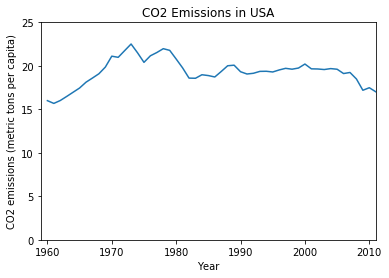

In [13]:


plt.plot(df1['Year'].values, df1['Value'].values)


plt.xlabel('Year')
plt.ylabel(df1['IndicatorName'].iloc[0])


plt.title('CO2 Emissions in USA')


plt.axis([1959, 2011,0,25])

plt.show()
plt.xkcd()




### But how do the USA's numbers relate to those of other countries?

**Q2.3** 

- select CO2 emissions per capital for all countries in 2011
- plot a histogram of the emmissions per capita by country
- indicate the position of USA in the plot


In [14]:
# YOUR CODES
indicator = 'CO2 emissions \(metric'
year = 2011

indic_name = world['IndicatorName'].str.contains(indicator) 
years = world['Year'].isin([year])
co2_2011 = world[indic_name & years]
co2_2011.head()
print(len(co2_2011))







232


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


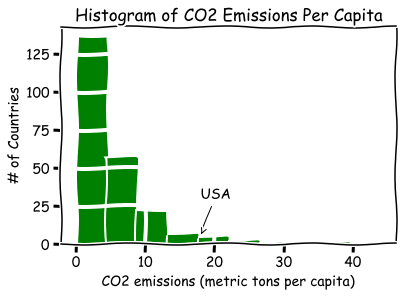

In [15]:

ig, ax = plt.subplots()

ax.annotate("USA",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
plt.hist(co2_2011['Value'], 10, normed=False, facecolor='green')

plt.xlabel(df1['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')
plt.xkcd()
plt.grid(True)
plt.show()

### ScatterPlot for comparing GDP against CO2 emissions (per capita) in USA

**Q2.4** 

- Select GDP Per capital for USA (Indicator = 'GDP per capita (constant 2005 US$)')
- Use a scattor plot to explore the relationship between GDP and CO2 emissions

Hint: before plotting, you have to make sure that the two measures cover the same period of time

In [16]:
# YOUR CODES

indicator = 'GDP per capita \(constant 2005'
country = 'USA'

indic_name = world['IndicatorName'].str.contains(indicator) 
con_code = world['CountryCode'].str.contains(country)
gdp = world[indic_name & con_code]


In [17]:
gdp.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


55
52


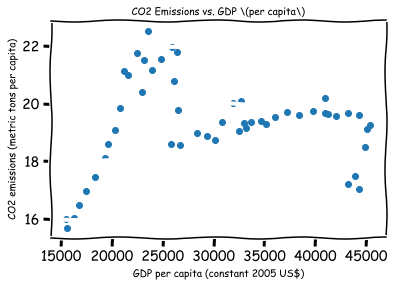

In [18]:
gdp_x = gdp[gdp['Year'] < 2012]
print(len(gdp))
print(len(df1))
fig, axis = plt.subplots()


axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_x['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(df1['IndicatorName'].iloc[0],fontsize=10)

X = gdp_x['Value']
Y = df1['Value']

axis.scatter(X, Y)
plt.xkcd()
plt.show()

## Part III: We are missing data 

The above analyses have suggested that not all countries have all indicators for all years. Thus, let's pick indicators and countries which have data over the same time range

In [19]:
countries_list = world['CountryName'].unique().tolist()
indicators_list = world['IndicatorName'].unique().tolist()

yearfilter = range(2000,2011)
print(len(indicators_list), len(countries_list))

1344 247


**Q3.1** write a program to find **TWO** countries from **countries_list** and **ONE** indicator from **indicators_list** so that the selected two countries have records of the indicator from 2000 to 2011 (the time range is defined in **yearfilter**). 

For example, both Bermuda and Costa Rica have records of the indicator "Merchandise exports to developing economies outside region (% of total merchandise exports)" from 2000 to 2011.

Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html

Expected output:
- Two dataframe, indicating the two countries separately
- The two dataframe only include data with the specific indicator
- Both dataframe cover the same period of time from 2000 to 2011

In [20]:
import random
random.seed(25) # generate the same random number every time

# YOUR CODES


'''
Hints:

Step 1: pick one indicator from the indicator_list (you can use loops or randomly draw from indicators_list)
Step 2: given the selected indicator, pick two countries that have records over the 12 years (2000-2011). 

You can use loops (for or while) to repeat the above two steps until you find the satisfying countries and indicators. 
'''
# range of the three variables

import random
random.seed(25) # generate the same random number every time

# YOUR CODES


'''
Hints:

Step 1: pick one indicator from the indicator_list (you can use loops or randomly draw from indicators_list)
Step 2: given the selected indicator, pick two countries that have records over the 12 years (2000-2011). 

You can use loops (for or while) to repeat the above two steps until you find the satisfying countries and indicators. 
'''

# first select the indicators within the year range 
indicators_list_withinyear = world[world['Year'].isin(yearfilter)]['IndicatorName'].unique().tolist()
# select a random indicator within the list 
selected_indicator = np.random.choice(indicators_list_withinyear,1)


# now find the countries which have data within the year range and has  the indicator
countries_list_withinyear = world[(world['Year'].isin(yearfilter)) & (world['IndicatorName'].isin(selected_indicator))]['CountryName'].unique().tolist()
# select a 2 random countries within the list 
selected_countries = np.random.choice(countries_list_withinyear,2)

#select two country data using the selected countries and indicator and the year range
country_one  = world[(world['CountryName']==selected_countries[0]) & (world['IndicatorName'].isin(selected_indicator)) & (world['Year'].isin(yearfilter))].sort_values('Year')
country_two  = world[(world['CountryName']==selected_countries[1]) & (world['IndicatorName'].isin(selected_indicator)) & (world['Year'].isin(yearfilter))].sort_values('Year')

print(country_one['CountryName'].unique(), country_one['IndicatorName'].unique())
print(country_two['CountryName'].unique(), country_two['IndicatorName'].unique())



['Georgia'] ['Death rate, crude (per 1,000 people)']
['Central African Republic'] ['Death rate, crude (per 1,000 people)']


**Q3.2** Plot the correlation of the two countries with the selected indicator (scatter plots) (6 points)

Text(0.5, 1.0, 'correlation between the values within the indicator - Death rate, crude (per 1,000 people)')

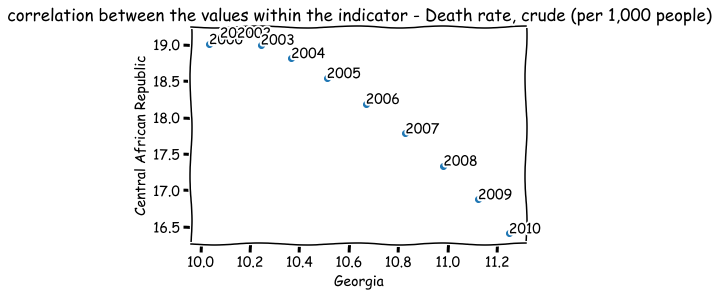

In [21]:
# YOUR CODES


import matplotlib.pyplot as plt
# plot values
plt.scatter(country_one['Value'], country_two['Value'])

# add x an y labels
plt.xlabel(selected_countries[0])
plt.ylabel(selected_countries[1])

# annotate each point with the year
for i, yr in enumerate(country_one['Year']):
    plt.annotate(yr, (country_one['Value'].iloc[i], country_two['Value'].iloc[i]))
    
# add title
plt.title('correlation between the values within the indicator - ' + selected_indicator[0])


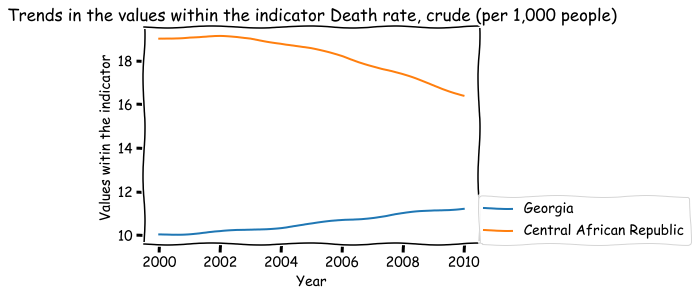

In [22]:
import matplotlib.pyplot as plt

#trends in those years
plt.plot(country_one['Year'],country_one['Value'])
plt.plot(country_one['Year'], country_two['Value'])

plt.xlabel('Year')
plt.ylabel('Values witin the indicator ' )

plt.title('Trends in the values within the indicator ' + selected_indicator[0])
plt.legend(selected_countries,loc=(1,0))

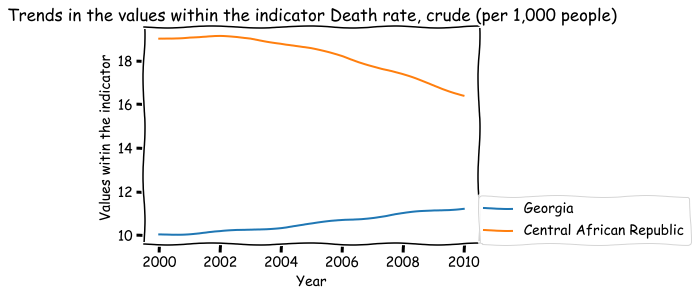

In [23]:
import matplotlib.pyplot as plt

#trends in those years
plt.plot(country_one['Year'],country_one['Value'])
plt.plot(country_one['Year'], country_two['Value'])

plt.xlabel('Year')
plt.ylabel('Values witin the indicator ' )

plt.title('Trends in the values within the indicator ' + selected_indicator[0])
plt.legend(selected_countries,loc=(1,0))